In [4]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [237]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [239]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Detecting Outliers

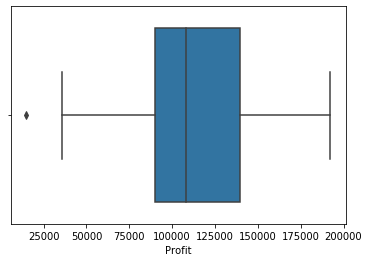

In [240]:
sns.boxplot(x='Profit',data=df)

In [241]:
from datasist.structdata import detect_outliers
L=['R&D Spend','Administration','Marketing Spend','Profit']
for col in L:
    indx=detect_outliers(df,0,[col])
    print(f'indicies of the outliers in {col} are:{indx}')
    df.loc[indx,col]=df[col].median()

indicies of the outliers in R&D Spend are:[]
indicies of the outliers in Administration are:[]
indicies of the outliers in Marketing Spend are:[]
indicies of the outliers in Profit are:[49]


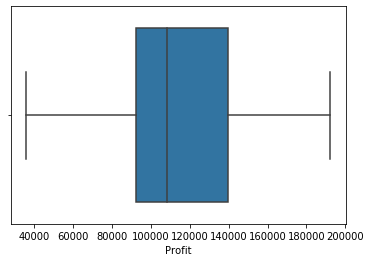

In [242]:
sns.boxplot(x='Profit',data=df)

## Categorical feature

In [5]:
df=pd.get_dummies(df,columns=['State'],drop_first=True)
df

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


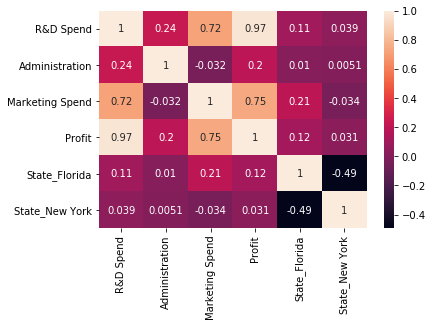

In [6]:
sns.heatmap(df.corr(),annot=True)

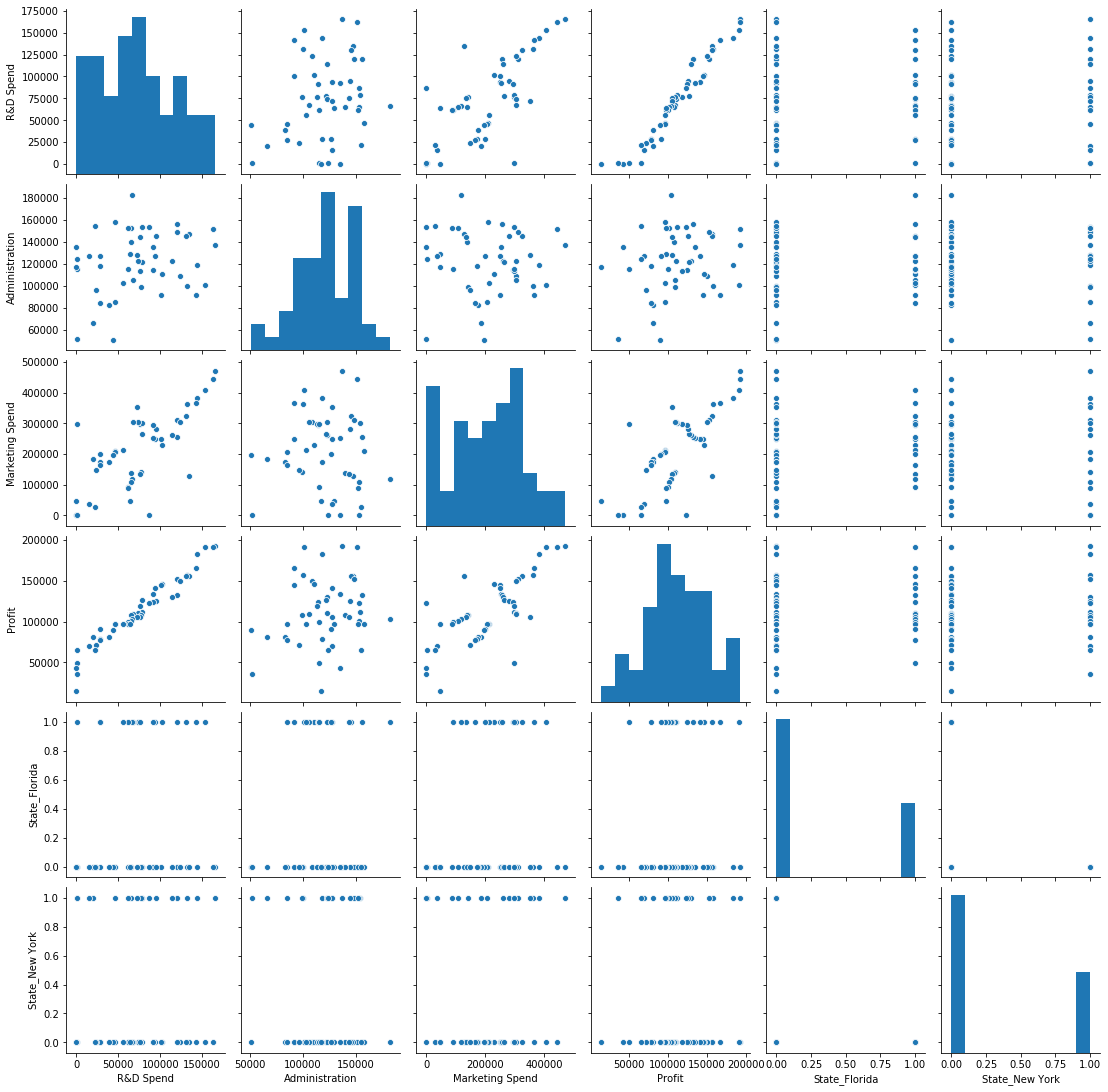

In [7]:
sns.pairplot(data=df)

In [8]:
x=df.drop(['Profit','State_Florida','State_New York'],axis=1)
y=df['Profit']

In [9]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


### Both R&D and Marketing spend tends to have linear relationship with the profit

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [26]:
x_test

,R&D Spend,Administration,Marketing Spend
10,101913.08,110594.11,229160.95
13,91992.39,135495.07,252664.93
30,61994.48,115641.28,91131.24
46,1315.46,115816.21,297114.46
18,91749.16,114175.79,294919.57
0,165349.20,136897.80,471784.10
40,28754.33,118546.05,172795.67
12,93863.75,127320.38,249839.44
29,65605.48,153032.06,107138.38
8,120542.52,148718.95,311613.29


In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.14946664,  1.13490863,  0.79504021],
       [-1.5699115 ,  0.52248256, -1.63886107],
       [ 0.63820609, -0.93414402,  0.38909341],
       [-0.95811406, -1.17047663, -0.30333998],
       [ 1.32264868, -0.666291  ,  1.30761492],
       [ 1.99647224,  1.05493294,  1.96564606],
       [ 1.38271568,  0.91544281, -0.6017858 ],
       [ 0.01168143,  0.27004258,  1.2290321 ],
       [-1.5699115 , -0.09316846, -1.27205062],
       [ 0.1199556 , -0.68409546, -0.49737744],
       [-0.228959  ,  1.09914049, -0.92251889],
       [ 0.94202527,  0.09486842,  0.48679203],
       [-0.56064967, -1.15923822,  0.02996581],
       [ 0.08233608,  0.81320027, -0.55035908],
       [ 1.28802027,  0.85973615,  0.99105483],
       [ 0.10262462, -0.19720055,  0.78632879],
       [-1.55802229, -2.27097095, -1.63886107],
       [ 1.59672256, -0.03681955,  1.47276393],
       [-0.0886672 , -0.4681303 ,  0.83589608],
       [-1.08346962,  1.1693816 , -1.40877988],
       [ 1.547041  , -0.94745772,  1.334

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [29]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(n_neighbors=5),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(n_estimators=15),
    'XGBR':XGBRegressor()
}

In [30]:
for name,model in models.items():
    print(f'model used is {name}')
    model.fit(x_train,y_train) 
    print(f'training accuracy: {model.score(x_train,y_train)}')
    print(f'testing accuracy: {model.score(x_test,y_test)}')
    print('_'*30)

model used is LR
training accuracy: 0.9053741562154424
testing accuracy: 0.9525595372586795
______________________________
model used is KNN
training accuracy: 0.865505790895896
testing accuracy: 0.7702244319486197
______________________________
model used is SVR
training accuracy: -0.012614996246793853
testing accuracy: -0.1344588673693441
______________________________
model used is DT
training accuracy: 1.0
testing accuracy: 0.8390923372383996
______________________________
model used is RF
training accuracy: 0.9800722597571315
testing accuracy: 0.8609844727454093
______________________________
model used is XGBR
training accuracy: 0.9999999999981887
testing accuracy: 0.8565988310170302
______________________________


###  LR will be used 

In [66]:
model=LinearRegression()
model.fit(x_train,y_train)

['scaler.pkl']

In [71]:
model.coef_

array([3.17411317e+04, 3.08680088e+01, 4.17599003e+03])

In [72]:
model.intercept_

111862.5135

# DATASET 2

In [16]:
data= pd.read_csv('Houses prices.csv')

In [17]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## Checking null values

In [19]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## Outliers Detection

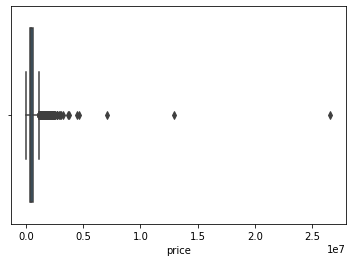

In [22]:
sns.boxplot(data['price'])

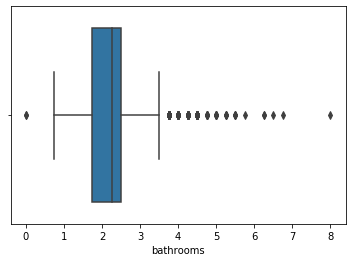

In [21]:
sns.boxplot(data['bathrooms'])

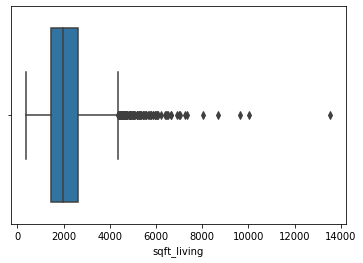

In [11]:
sns.boxplot(data['sqft_living'])

In [34]:
list=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']
from datasist.structdata import detect_outliers
for col in list:
    index=detect_outliers(data,0,[col])
    data.loc[index,col]=data[col].median()
    print(index)


[]
[]
[]
[]
[]
[]
[]
[]


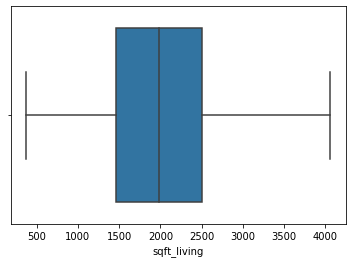

In [35]:
sns.boxplot(data['sqft_living'])

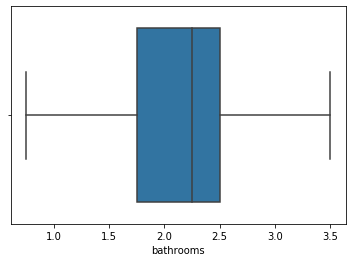

In [36]:
sns.boxplot(data['bathrooms'])

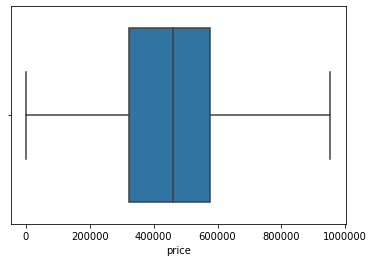

In [37]:
sns.boxplot(data['price'])

### Feature engineering

In [38]:
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d %H:%M:%S',errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   float64       
 5   sqft_lot       4600 non-null   float64       
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   float64       
 11  sqft_basement  4600 non-null   float64       
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [39]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.000000,3.0,1.50,1340.0,7912.0,1.5,0,0,3,1340.0,0.0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,460943.461539,5.0,2.50,3650.0,9050.0,2.0,0,4,5,3370.0,280.0,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.000000,3.0,2.00,1930.0,11947.0,1.0,0,0,4,1930.0,0.0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.000000,3.0,2.25,2000.0,8030.0,1.0,0,0,4,1000.0,1000.0,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.000000,4.0,2.50,1940.0,10500.0,1.0,0,0,4,1140.0,800.0,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.666667,3.0,1.75,1510.0,6360.0,1.0,0,0,4,1510.0,0.0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.333333,3.0,2.50,1460.0,7573.0,2.0,0,0,3,1460.0,0.0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.166667,3.0,2.50,3010.0,7014.0,2.0,0,0,3,3010.0,0.0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400.000000,4.0,2.00,2090.0,6630.0,1.0,0,0,3,1070.0,1020.0,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### Droping un-needed features 

In [40]:
data.drop(['country','statezip','street','city'], axis=1, inplace= True)

### the years renovated can be convertred to categorical variable with 3 categories, never renovated"0", renovated in last ten years"1", renovated happened more than 10 years ago "2" and the year built in 2 categoies old built from 1990 to 1957 and new from 1957 to 2014

In [41]:
data['yr_renovated'].max()

2014

In [42]:
(data['yr_renovated']<=2004).sum()

4014

In [43]:
def renovate(x):
    if x == 0:
        return 0
    elif x in range(2004,2015):
        return 1
    else:
        return 2

In [44]:
data['yr_renovated']=data['yr_renovated'].apply(renovate)

In [45]:
data['yr_renovated'].unique()

array([1, 0, 2], dtype=int64)

In [46]:
data['yr_built'].min()

1900

In [47]:
def built(x):
    if x in range(1900,1957):
        return 'old'
    elif x in range(1957,2015):
        return 'new'

In [48]:
data['yr_built']=data['yr_built'].apply(built)

In [49]:
data['yr_built'].unique()

array(['old', 'new'], dtype=object)

In [50]:
data=pd.get_dummies(data,columns=['yr_built'],drop_first=True)

In [51]:
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month

In [52]:
data['month'].unique()

array([5, 6, 7], dtype=int64)

In [53]:
data['year'].unique()

array([2014], dtype=int64)

#### Since its only one year and 3 month in the same season so we will drop date feature, month and year

In [54]:
data.drop(['date','month','year'], axis=1, inplace=True)

In [55]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,yr_built_old
0,313000.000000,3.0,1.50,1340.0,7912.0,1.5,0,0,3,1340.0,0.0,1,1
1,460943.461539,5.0,2.50,3650.0,9050.0,2.0,0,4,5,3370.0,280.0,0,1
2,342000.000000,3.0,2.00,1930.0,11947.0,1.0,0,0,4,1930.0,0.0,0,0
3,420000.000000,3.0,2.25,2000.0,8030.0,1.0,0,0,4,1000.0,1000.0,0,0
4,550000.000000,4.0,2.50,1940.0,10500.0,1.0,0,0,4,1140.0,800.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510.0,6360.0,1.0,0,0,4,1510.0,0.0,2,1
4596,534333.333333,3.0,2.50,1460.0,7573.0,2.0,0,0,3,1460.0,0.0,1,0
4597,416904.166667,3.0,2.50,3010.0,7014.0,2.0,0,0,3,3010.0,0.0,0,0
4598,203400.000000,4.0,2.00,2090.0,6630.0,1.0,0,0,3,1070.0,1020.0,0,0


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
Y=data['price']

In [58]:
X=data.drop('price', axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,yr_built_old
0,3.0,1.50,1340.0,7912.0,1.5,0,0,3,1340.0,0.0,1,1
1,5.0,2.50,3650.0,9050.0,2.0,0,4,5,3370.0,280.0,0,1
2,3.0,2.00,1930.0,11947.0,1.0,0,0,4,1930.0,0.0,0,0
3,3.0,2.25,2000.0,8030.0,1.0,0,0,4,1000.0,1000.0,0,0
4,4.0,2.50,1940.0,10500.0,1.0,0,0,4,1140.0,800.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510.0,6360.0,1.0,0,0,4,1510.0,0.0,2,1
4596,3.0,2.50,1460.0,7573.0,2.0,0,0,3,1460.0,0.0,1,0
4597,3.0,2.50,3010.0,7014.0,2.0,0,0,3,3010.0,0.0,0,0
4598,4.0,2.00,2090.0,6630.0,1.0,0,0,3,1070.0,1020.0,0,0


In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_Train=Scaler.fit_transform(X_train)
X_Test=Scaler.transform(X_test)

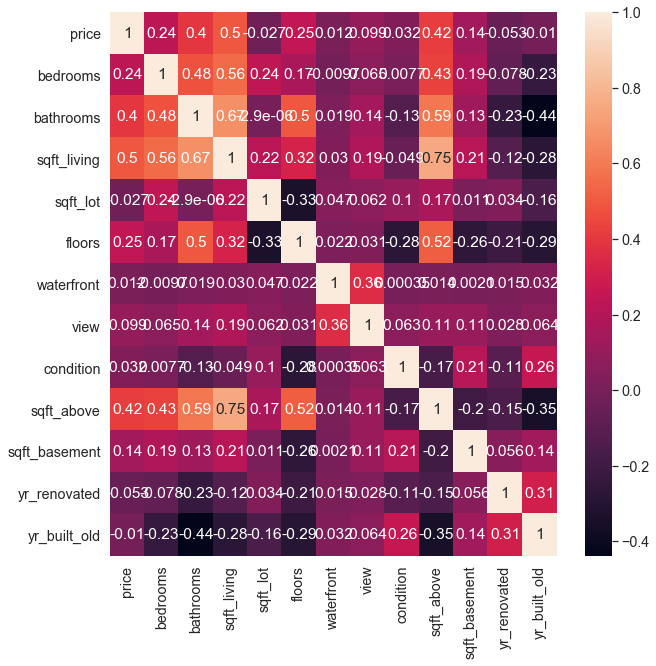

In [63]:
sns.heatmap(data.corr(),annot=True)
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

### From the heat map it's obvious that the model will not be linear regression since all the variables have weak linear realtionship with the price

In [67]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(n_neighbors=5),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(n_estimators=15),
    'XGBR':XGBRegressor()
}

In [68]:
for name,model in models.items():
    print(f'using:{name}')
    model.fit(X_train,Y_train)
    print(f'training accuracy: {model.score(X_train,Y_train)}')
    print(f'testing accuracy: {model.score(X_test,Y_test)}')
    print('_'*30)

using:LR
training accuracy: 0.3117672600508036
testing accuracy: 0.3056573776264828
______________________________
using:KNN
training accuracy: 0.4773355958316944
testing accuracy: 0.17494327915081154
______________________________
using:SVR
training accuracy: 0.0002421735774962297
testing accuracy: 0.0001737595281825488
______________________________
using:DT
training accuracy: 0.9947006992444762
testing accuracy: -0.23736376079681976
______________________________
using:RF
training accuracy: 0.8769500316445298
testing accuracy: 0.25304749435370977
______________________________
using:XGBR
training accuracy: 0.8422364371441929
testing accuracy: 0.24977442100432612
______________________________


In [70]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
import joblib
joblib.dump(model, 'model.h5')

['model.h5']